In [1]:
#Here we import all the necessary dependencies
import numpy as np
import matplotlib.pyplot as plt
import time
import amuse.plot as plot
from tqdm import tqdm
from IPython.display import clear_output
from amuse.lab import units, constants
from amuse.ext.orbital_elements import new_binary_from_orbital_elements
from amuse.ext.orbital_elements import get_orbital_elements_from_binary
from amuse.ext.orbital_elements import get_orbital_elements_from_binaries
from amuse.lab import Particles
from amuse.lab import nbody_system
from amuse.couple import bridge
from amuse.lab import Rebound
from amuse.lab import Mercury
from amuse.community.ph4.interface import ph4
from amuse.io import write_set_to_file, read_set_from_file
from amuse.lab import Huayno

In [2]:
data_loc = "Results/"

In [3]:
logtimes = [-1e9,6.698,7.0,7.176,7.301,7.397,7.477,7.544,7.602,7.653,7.698,7.740,7.778,7.812,7.845,7.875,7.903,7.929,7.954,7.977,8]
times = 10**np.array(logtimes)

MWG5_0 = read_set_from_file(data_loc + "MWG_run5_time=-inf.hdf5", format = "hdf5")
MWG5_1 = read_set_from_file(data_loc + "MWG_run5_time=6.698.hdf5", format = "hdf5")
MWG5_2 = read_set_from_file(data_loc + "MWG_run5_time=7.0.hdf5", format = "hdf5")
MWG5_3 = read_set_from_file(data_loc + "MWG_run5_time=7.176.hdf5", format = "hdf5")
MWG5_4 = read_set_from_file(data_loc + "MWG_run5_time=7.301.hdf5", format = "hdf5")
MWG5_5 = read_set_from_file(data_loc + "MWG_run5_time=7.397.hdf5", format = "hdf5")
MWG5_6 = read_set_from_file(data_loc + "MWG_run5_time=7.477.hdf5", format = "hdf5")
MWG5_7 = read_set_from_file(data_loc + "MWG_run5_time=7.544.hdf5", format = "hdf5")
MWG5_8 = read_set_from_file(data_loc + "MWG_run5_time=7.602.hdf5", format = "hdf5")
MWG5_9 = read_set_from_file(data_loc + "MWG_run5_time=7.653.hdf5", format = "hdf5")
MWG5_10 = read_set_from_file(data_loc + "MWG_run5_time=7.698.hdf5", format = "hdf5")
MWG5_11 = read_set_from_file(data_loc + "MWG_run5_time=7.740.hdf5", format = "hdf5")
MWG5_12 = read_set_from_file(data_loc + "MWG_run5_time=7.778.hdf5", format = "hdf5")
MWG5_13 = read_set_from_file(data_loc + "MWG_run5_time=7.812.hdf5", format = "hdf5")
MWG5_14 = read_set_from_file(data_loc + "MWG_run5_time=7.845.hdf5", format = "hdf5")
MWG5_15 = read_set_from_file(data_loc + "MWG_run5_time=7.875.hdf5", format = "hdf5")
MWG5_16 = read_set_from_file(data_loc + "MWG_run5_time=7.903.hdf5", format = "hdf5")
MWG5_17 = read_set_from_file(data_loc + "MWG_run5_time=7.929.hdf5", format = "hdf5")
MWG5_18 = read_set_from_file(data_loc + "MWG_run5_time=7.954.hdf5", format = "hdf5")
MWG5_19 = read_set_from_file(data_loc + "MWG_run5_time=7.977.hdf5", format = "hdf5")
MWG5_20 = read_set_from_file(data_loc + "MWG_run5_final.hdf5", format = "hdf5")

In [15]:
sets = []
for i in range(21):
    exec("sets.append(MWG5_"+str(i)+")")

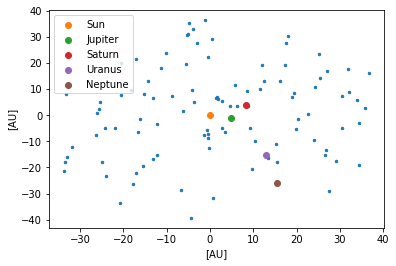

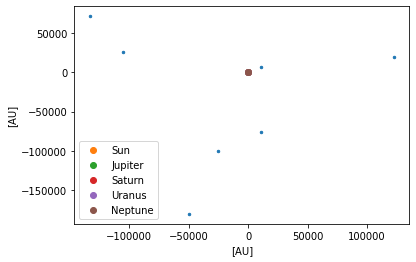

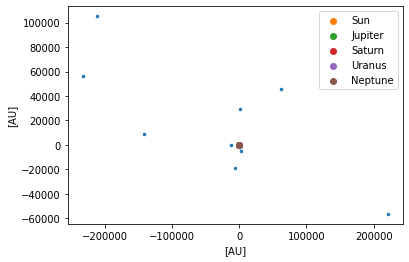

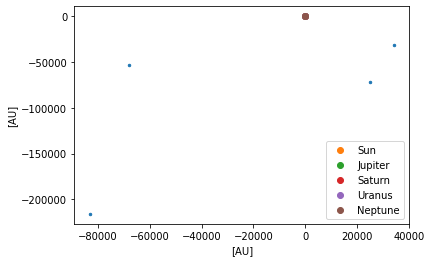

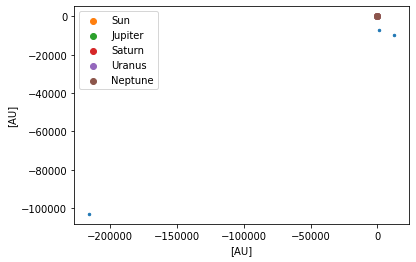

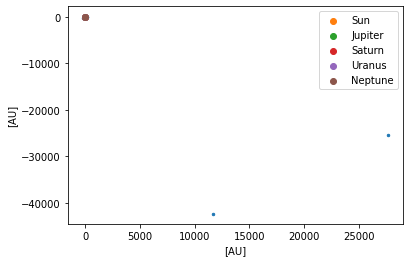

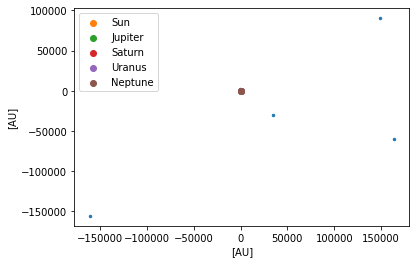

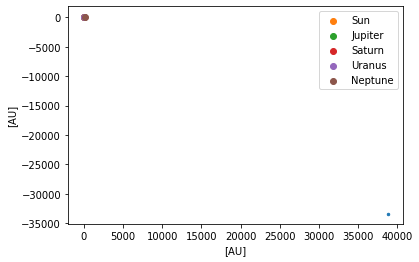

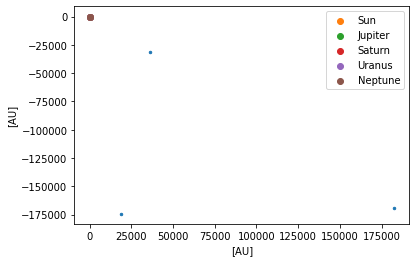

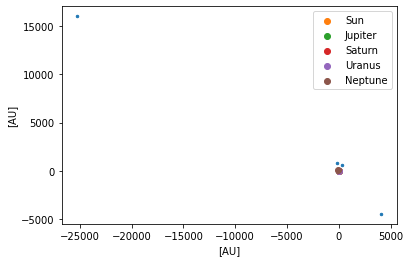

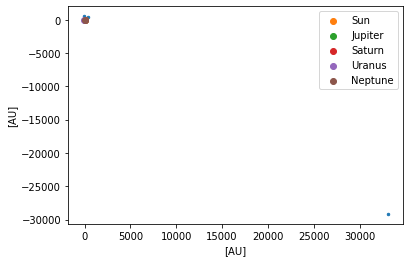

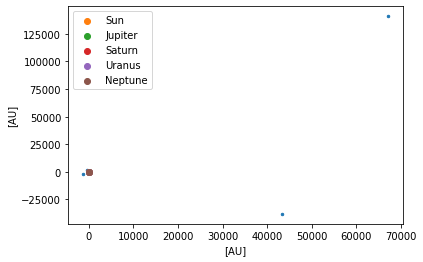

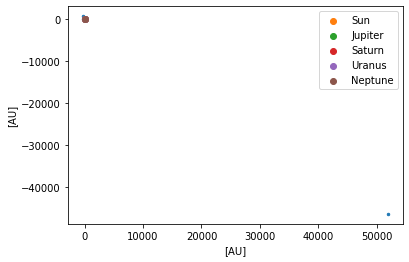

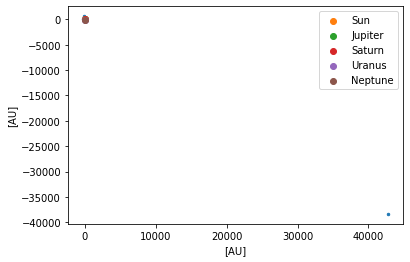

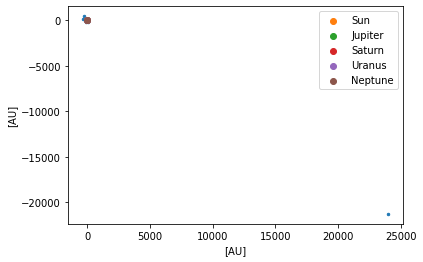

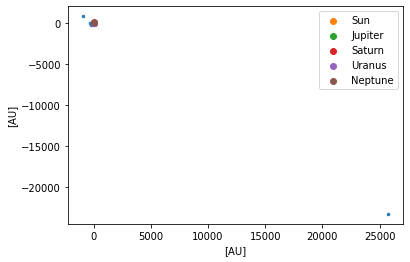

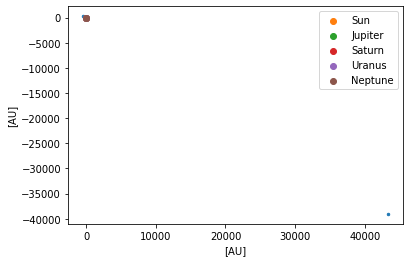

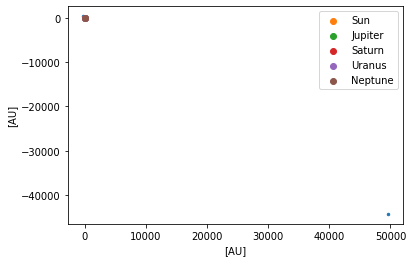

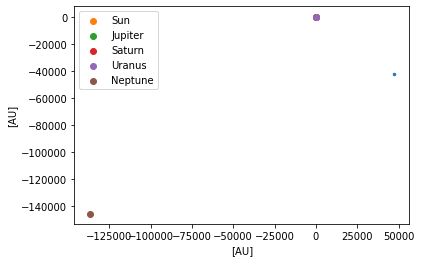

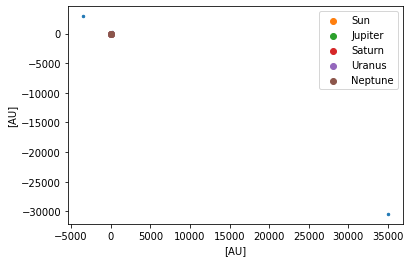

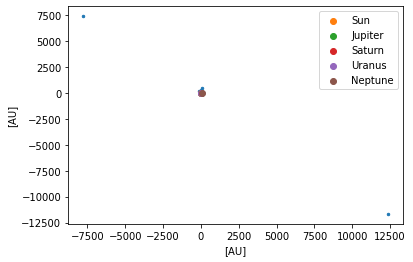

In [16]:
names = ['Sun', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']
for particles in sets:
    particles.position -= particles[0].position # Change coordinates of all particles to be centered around the Sun
    plot.scatter(particles.x.in_(units.AU), particles.y.in_(units.AU), s=6)
    for j in range(5):
        plot.scatter(particles[j].x.in_(units.AU), particles[j].y.in_(units.AU), label = names[j])
    plt.legend()
    #plot.xlim(particles[0].x -  (200 | units.AU), particles[0].x + (200 | units.AU))
    #plot.ylim(particles[0].y -  (200 | units.AU), particles[0].y + (200 | units.AU))
    plt.show()

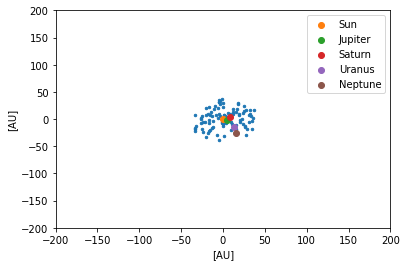

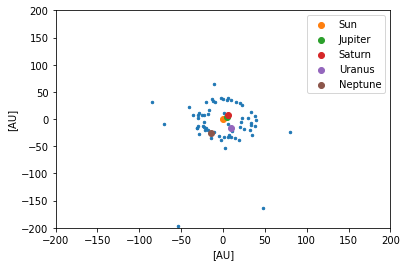

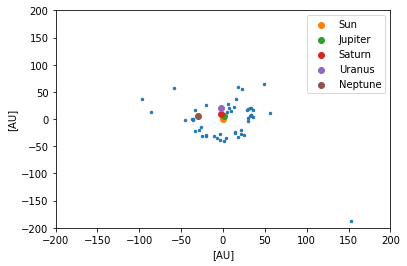

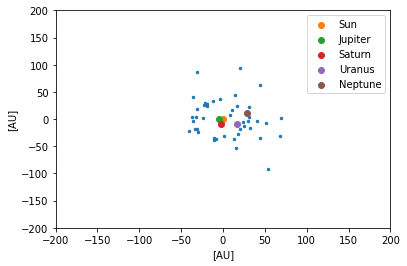

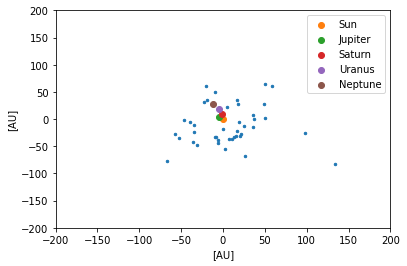

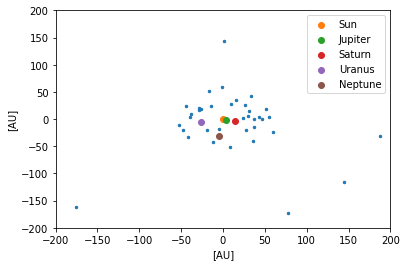

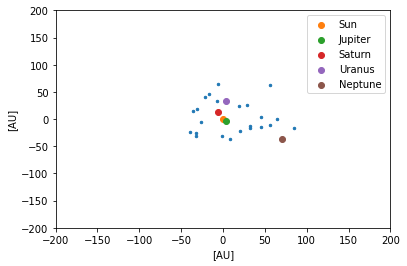

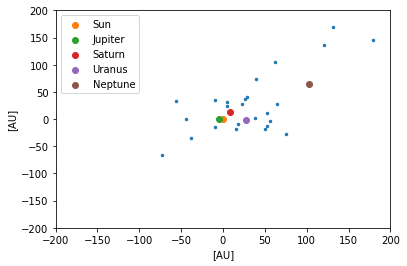

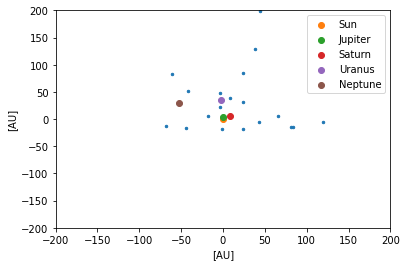

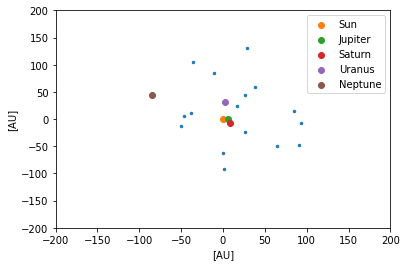

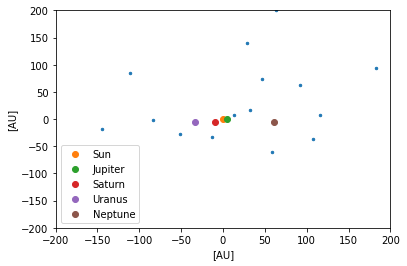

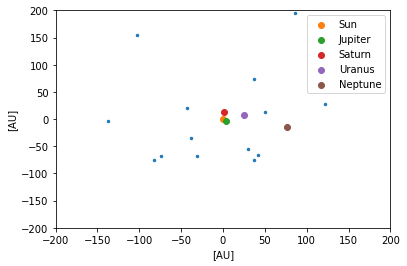

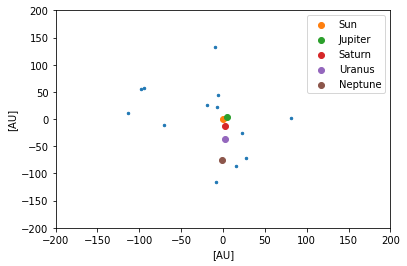

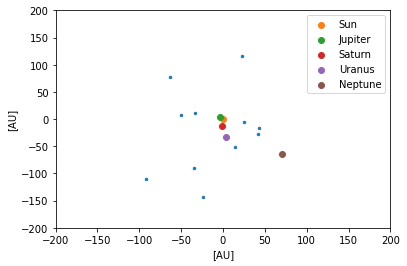

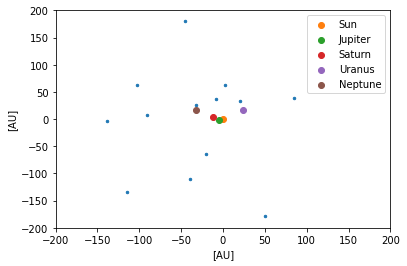

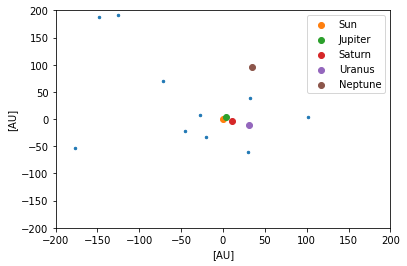

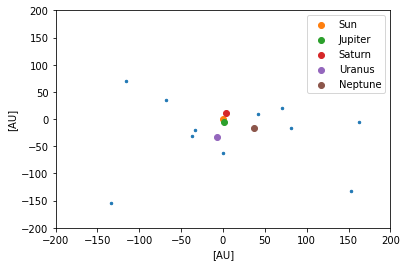

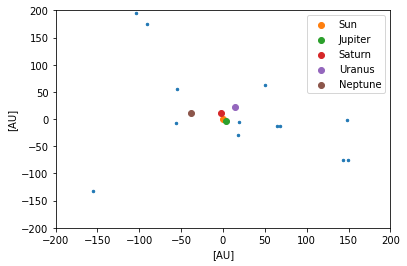

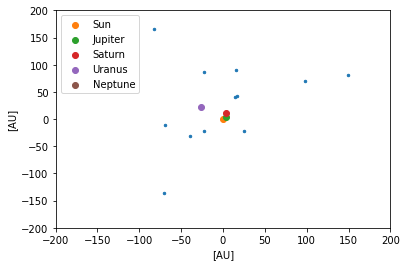

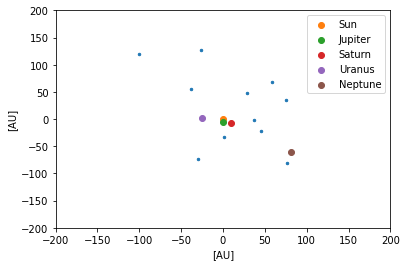

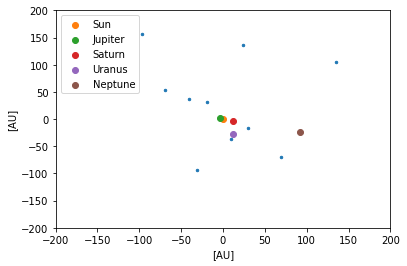

In [17]:
for particles in sets:
    plot.scatter(particles.x.in_(units.AU), particles.y.in_(units.AU), s=6)
    for j in range(5):
        plot.scatter(particles[j].x.in_(units.AU), particles[j].y.in_(units.AU), label = names[j])
    plt.legend()
    plot.xlim(particles[0].x -  (200 | units.AU), particles[0].x + (200 | units.AU))
    plot.ylim(particles[0].y -  (200 | units.AU), particles[0].y + (200 | units.AU))
    plt.show()

In [18]:
def separations(p1, p2):
    return (p1.position - p2.position).length()

def v_esc(M,r):
    return (2*constants.G*M/r).sqrt()

def v_rel(Sun, particles):
    return (Sun.velocity-particles.velocity).length()

def a_orbit(Sun, particles):
    return get_orbital_elements_from_binaries(Sun, particles, constants.G)[2]

/home/pim/.local/lib/python3.6/site-packages/amuse/units/quantities.py:135: RuntimeWarning: invalid value encountered in true_divide
  return new_quantity_nonone(operator.__truediv__(self.number,other.number), (self.unit / other.unit).to_simple_form())


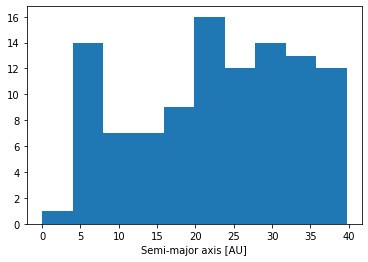

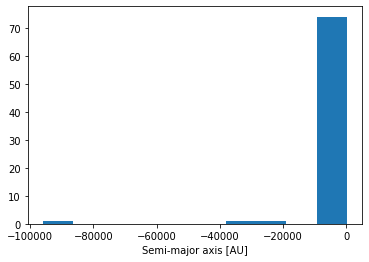

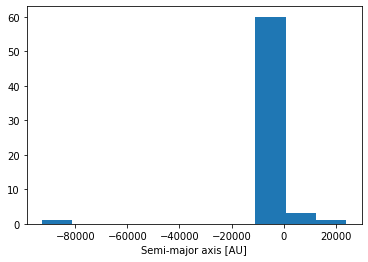

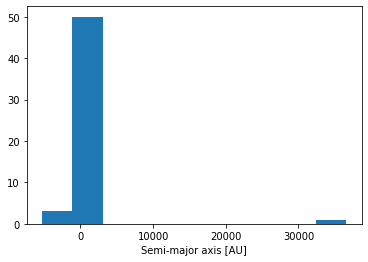

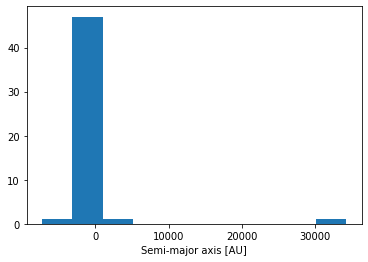

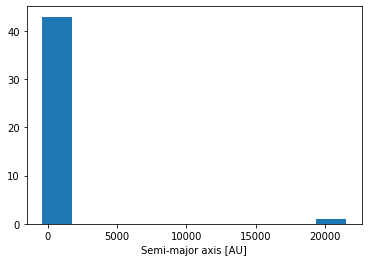

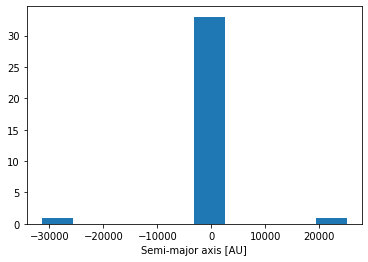

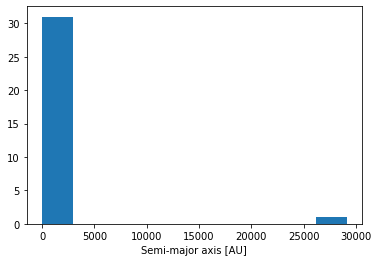

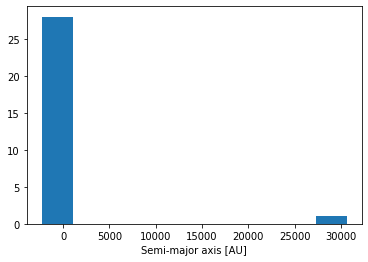

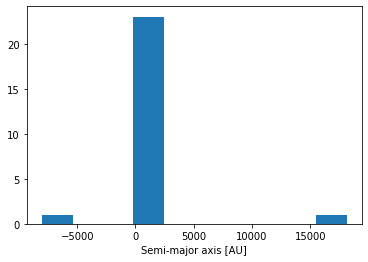

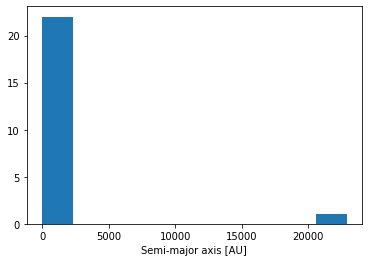

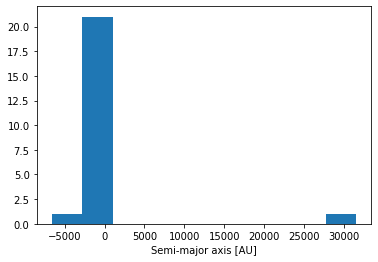

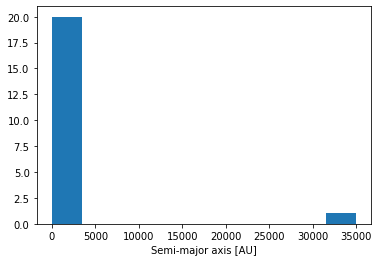

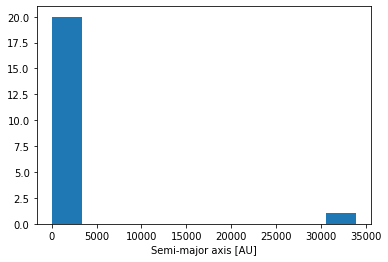

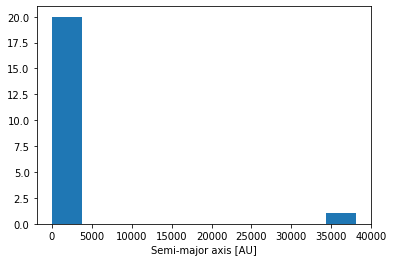

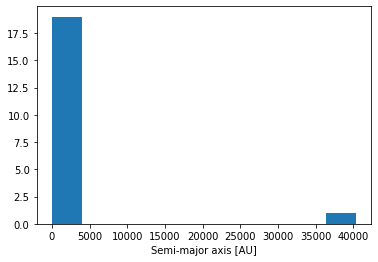

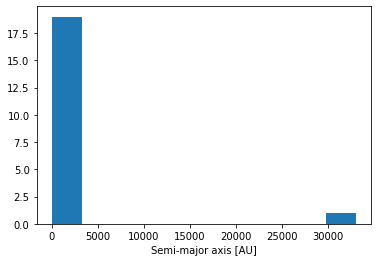

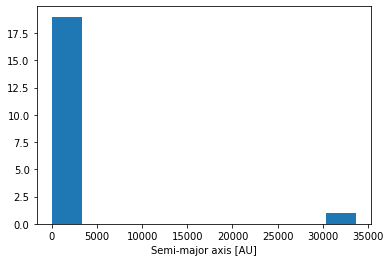

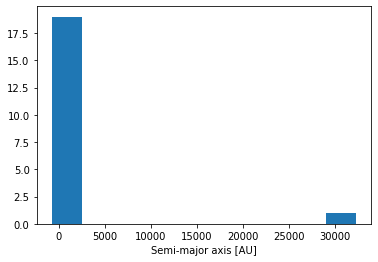

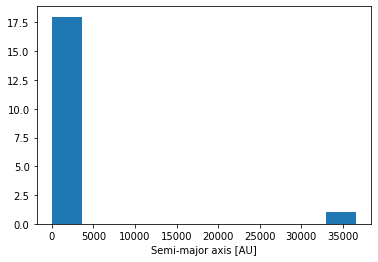

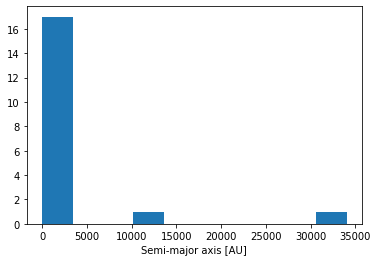

In [19]:
for particles in sets:
    plot.hist(a_orbit(particles[0], particles).in_(units.AU))
    plt.xlabel("Semi-major axis [AU]")
    plt.show()

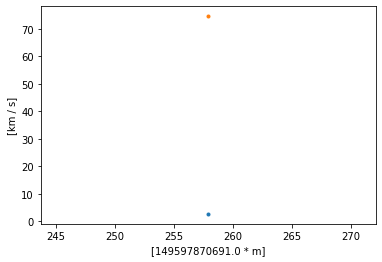

Text(0, 0.5, 'v_esc')

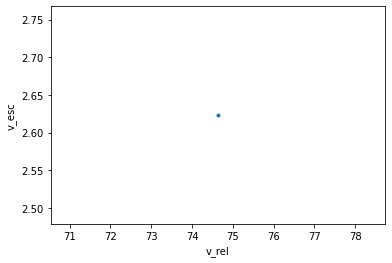

In [20]:
plot.plot(separations(sets[0][0], sets[0][1:]), v_esc(sets[0][0].mass, separations(sets[0][0], sets[0][1:])).in_(units.km/units.s), linewidth=0, marker='.')
plot.plot(separations(sets[0][0], sets[0][1:]), v_rel(sets[0][0], sets[0][1:]).in_(units.km/units.s), linewidth=0, marker='.')
plt.show()
plot.plot(v_rel(sets[0][0], sets[0][1:]).in_(units.km/units.s), v_esc(sets[0][0].mass, separations(sets[0][0], sets[0][1:])).in_(units.km/units.s), linewidth=0, marker='.')
plt.xlabel("v_rel")
plt.ylabel("v_esc")

In [21]:
def eccentricities(Sun, particles):
    return get_orbital_elements_from_binaries(Sun, particles, constants.G)[3]

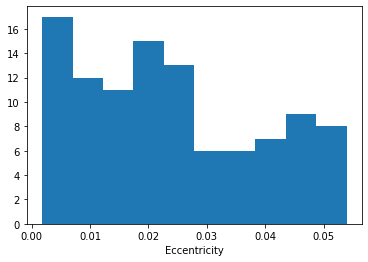

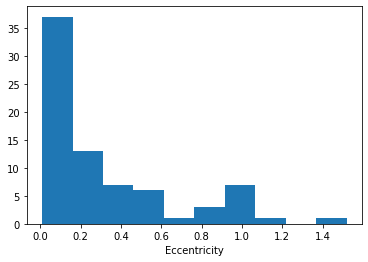

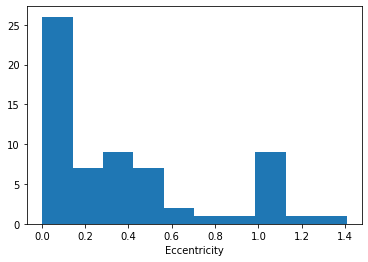

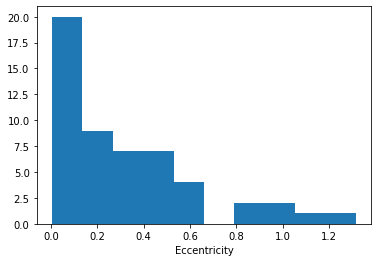

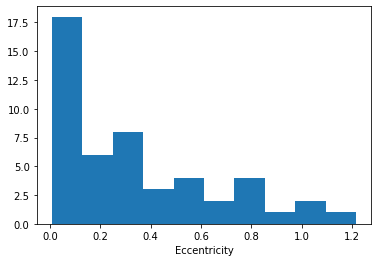

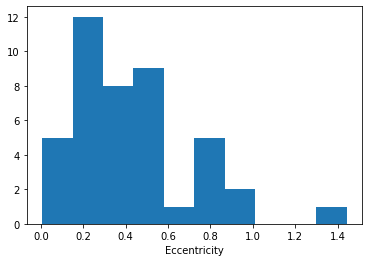

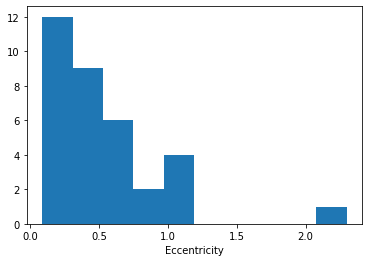

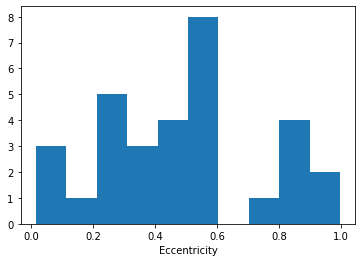

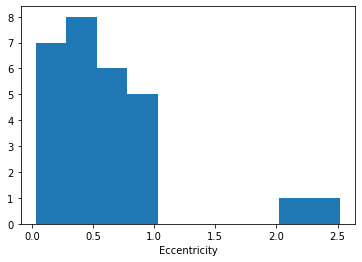

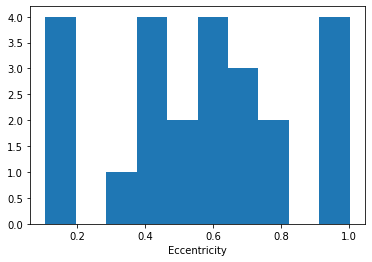

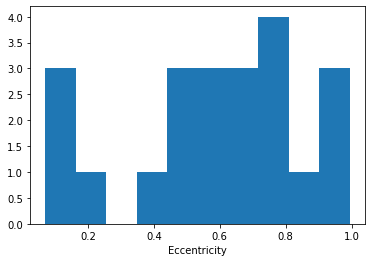

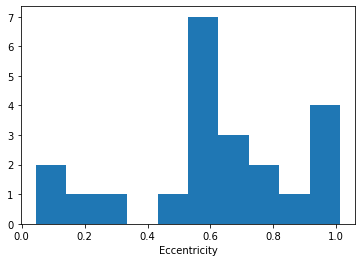

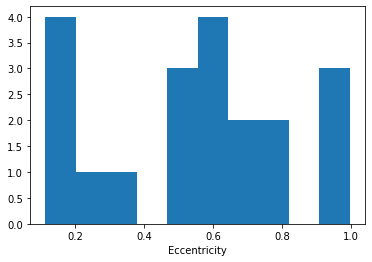

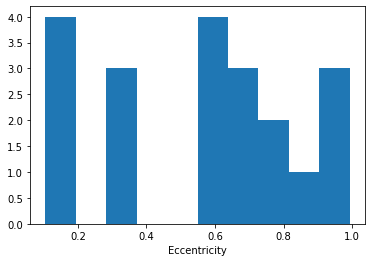

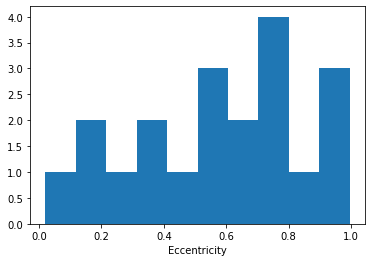

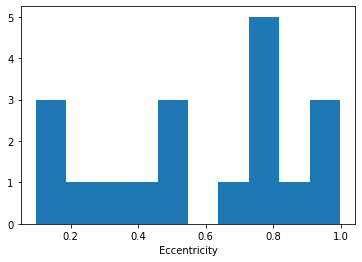

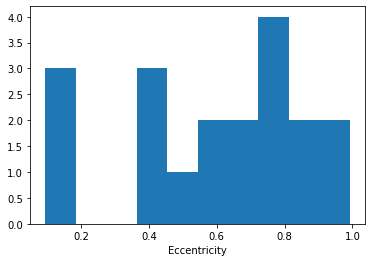

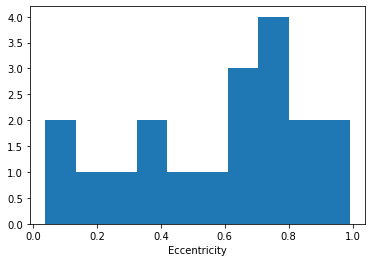

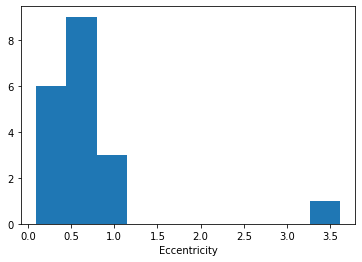

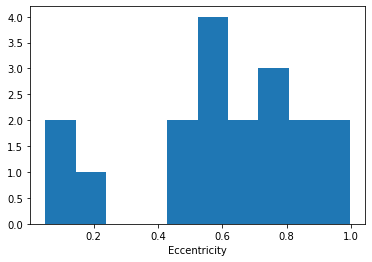

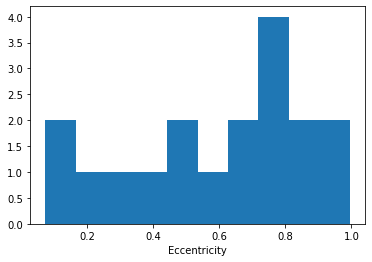

In [22]:
for particles in sets:
    plot.hist(eccentricities(particles[0], particles[1:]))
    plt.xlabel("Eccentricity")
    plt.show()

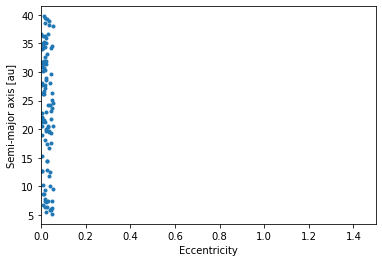

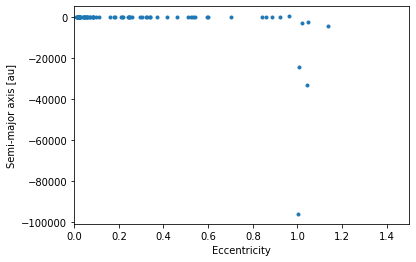

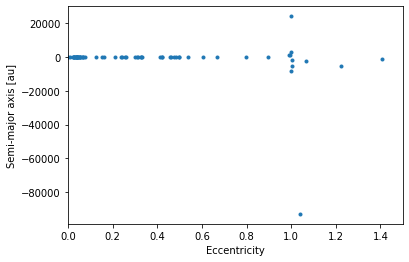

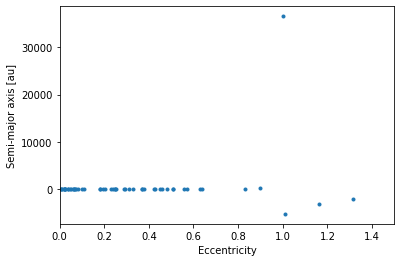

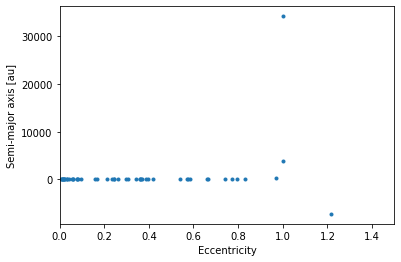

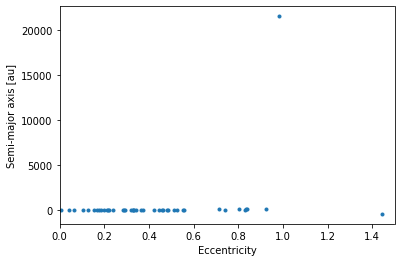

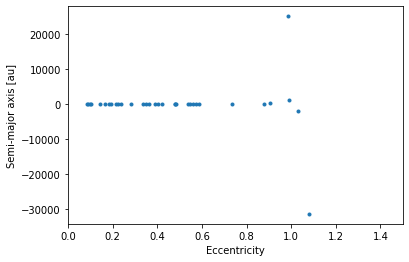

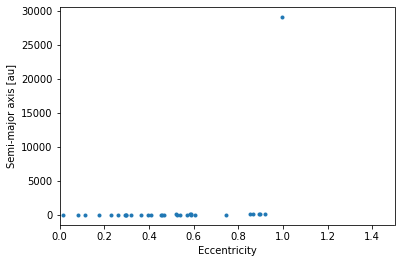

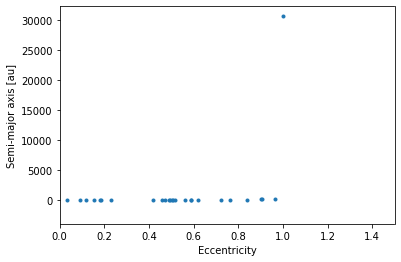

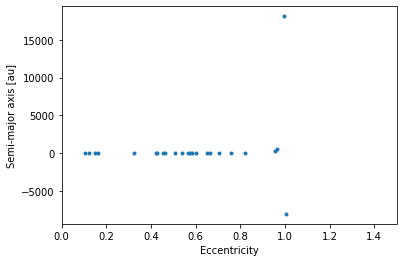

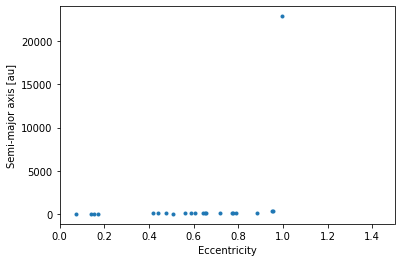

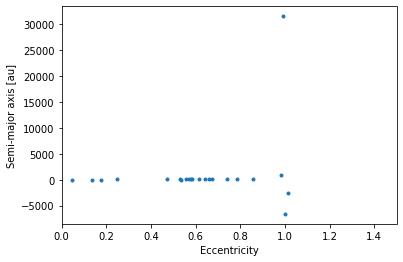

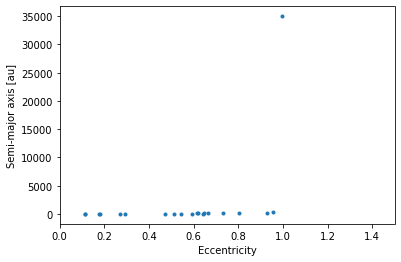

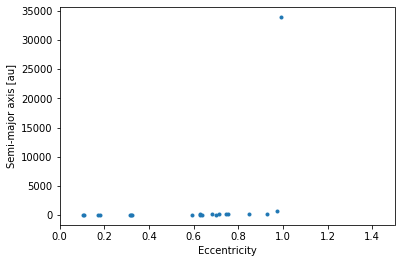

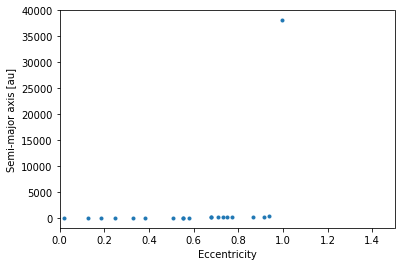

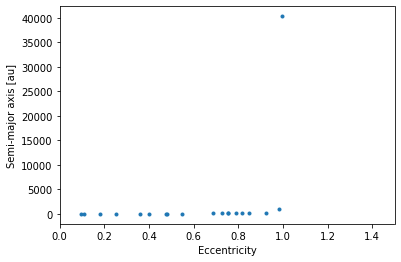

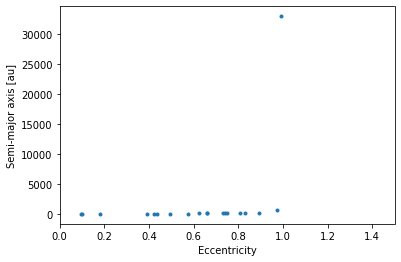

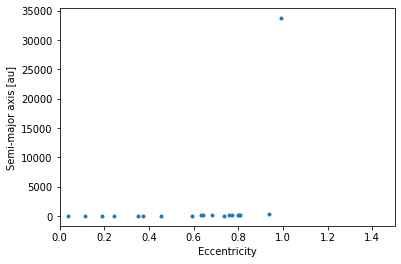

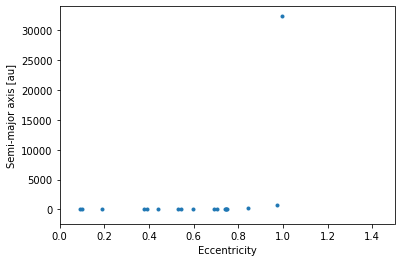

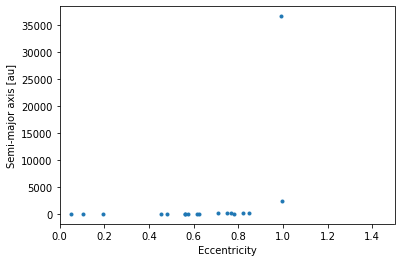

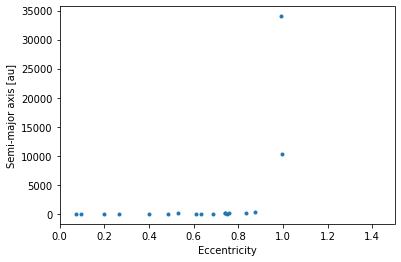

In [23]:
for particles in sets:
    plot.plot(eccentricities(particles[0], particles[1:]), a_orbit(particles[0], particles[1:]).in_(units.AU), linewidth=0, marker='.')
    plt.xlabel("Eccentricity")
    plt.ylabel("Semi-major axis [au]")
    plt.xlim(0, 1.5)
    #plt.ylim(0, 1000)
    plt.show()

In [24]:
# Find particles that have e < 0.9 and a > 2000 AU
oort_objs = np.argwhere((eccentricities(sets[20][0], sets[20][1:]) < 0.9) & (a_orbit(sets[20][0], sets[20][1:]) > 2000 |units.AU))
print("Particles that have non-hyperbolic orbits and have a semi-major axis belonging to Oort cloud objects:")
oort_obj_names = []
for i in oort_objs:
    oort_obj_names.append(sets[20][i][0].name)
    print(oort_obj_names[-1])

Particles that have non-hyperbolic orbits and have a semi-major axis belonging to Oort cloud objects:


In [25]:
eccs = []
semimajoraxes = []
for particles in sets:
    indices = []
    for oort in oort_obj_names:
        indices.append(np.where(particles.name == oort)[0][0])
    p_subset = particles[indices]
    print(p_subset.name)
    eccs.append(eccentricities(particles[0], p_subset))
    semimajoraxes.append(a_orbit(particles[0], p_subset).in_(units.AU).number) # .number is necessary here to plot

eccs, semimajoraxes = np.array(eccs).T, np.array(semimajoraxes).T
plot.scatter(eccs[0], semimajoraxes[0], label=oort_obj_names[0], c=times/1e6, cmap='Blues')
plot.plot(eccs[0], semimajoraxes[0], zorder=-1, color='C0')
plt.colorbar()
plot.scatter(eccs[1], semimajoraxes[1], label=oort_obj_names[1], c=times/1e6, cmap='Reds')
plot.plot(eccs[1], semimajoraxes[1], zorder=-1, color='red')
plt.xlabel("Eccentricity")
plt.ylabel("Semi-major axis [au]")
plt.colorbar(label="Time [Myr]")
plt.show()

[]


IndexError: index 0 is out of bounds for axis 0 with size 0